# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [62]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy.stats import linregress
from scipy.stats.stats import pearsonr

In [20]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [21]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\jason\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


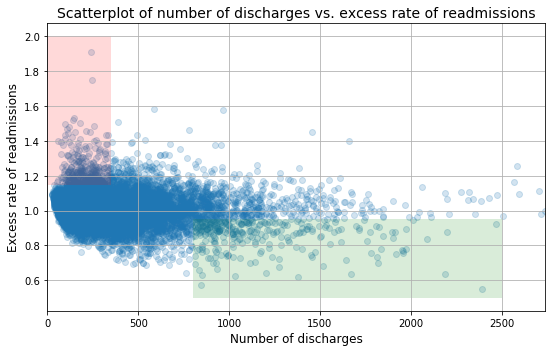

In [22]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 


**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?

Somewhat. I agree that the rate of readmissions is trending down, but only slightly, as you can see with the linear regression drawn in red below. The slope is -2.85e-5, which is nearly 0. I also only slightly agree with the two statements about shading. The red of course shows that lower number of discharges increases the rate of readmission, but only very slightly. Similarly, the green area shows that increasing the number of discharges reduces the rage of readmissions. The two variables are indirectly proportional (hence the negative slope). This however is based on the 'large' and 'small' categorized hospitals, which vary greatly in discharges. Further analysis is needed to determine if there is a difference between the two.

The slope of the line is: -2.8565052943822634e-05


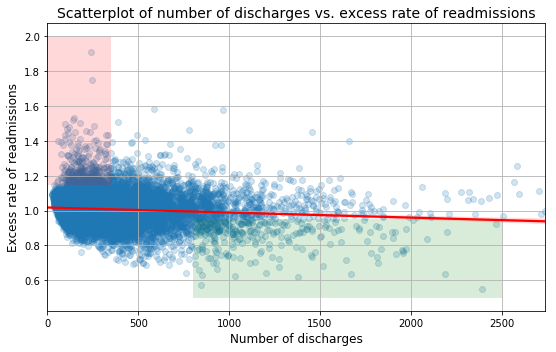

In [70]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
sns.regplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df, color='red', scatter=False)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)


ax.grid(True)
fig.tight_layout()
print('The slope of the line is:', linregress(x, y).slope)

In [92]:
df = clean_hospital_read_df #rename for ease of use

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
   1. Setup an appropriate hypothesis test.
      - H0:  ρ != 0 (there is a significant correlation between number of discharges (capacity) and readmission rates)
      - Ha:  ρ = 0

In [91]:
# Define small and large hospitals based on size used for shaded regions of graph and compare
small = df[df['Number of Discharges'] < 350]
large = df[df['Number of Discharges'] > 800]

small_rate = round(len(small[small['Excess Readmission Ratio'] > 1])/ len(small) * 100, 0)
large_rate = round(len(large[large['Excess Readmission Ratio'] > 1])/ len(large) * 100, 0)

print('Mean readmission rate for small hospitals:', round(np.mean(small['Excess Readmission Ratio']), 3), 'and', small_rate, '%have excess readmission rate greater than 1')
print('Mean readmission rate for large hospitals:', round(np.mean(large['Excess Readmission Ratio']), 3), 'and', large_rate, '%have excess readmission rate greater than 1')

Mean readmission rate for small hospitals: 1.013 and 53.0 %have excess readmission rate greater than 1
Mean readmission rate for large hospitals: 0.985 and 47.0 %have excess readmission rate greater than 1


It appears that the two groups are very similar from an initial standpoint after clearly defining them, making it look like there is no difference.

ρ= -0.09309554287590441


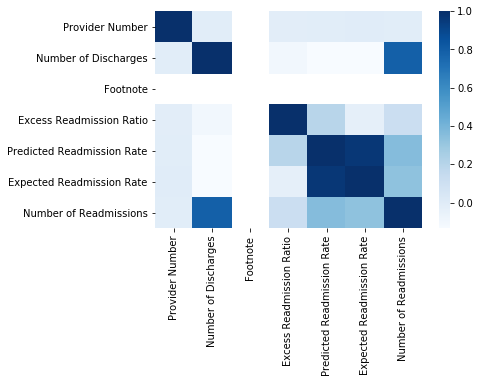

In [101]:
corr_plot = df.corr()
sns.heatmap(corr_plot, cmap='Blues')

corr = pearsonr(x, y)
print('ρ=', corr[0])

   2. Compute and report the observed significance value (or p-value) and 3. Report statistical significance for $\alpha$ = .01. 

In [104]:
# From above pearson test
print('p-value=', corr[1])

p-value= 1.5022756426464526e-23


Because the p-value is well below alpha = 0.01, we can reject H0 and declare that there is no significant correlation between readmission rates and number of discharges.

   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
      - Statistical differences are driven by math and set boundaries. With large enough samples they can be found with even very small differences.
      - Practical significance is when something has actual impact in the world, regardless of being deemed significant (or not). Such as with this example. We deemed that there was no significant correlation between readmission rates and number of discharges. This doesn't mean that there wasn't an observed difference. As shown in the shaded regions (and by the slope of the linear regression) there is clearly enough of a difference to cause a slight difference between the two. This was shown by quickly dividing the data in the large and small hospital sets.
      - Here, I would still consider doing further research into if there is a significant difference between large and small hospitals, and determine if that was different than the outcome solely based on correlation.
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
          * Con: It can be hard to see with all the points in the middle, clarity is lost. Green/Red shaded areas not clearly explained.
          * Pro: Clearly shows the relationship/lack of one between variables. Density of distribution is clearly seen
      - Construct another plot that conveys the same information in a more direct manner.

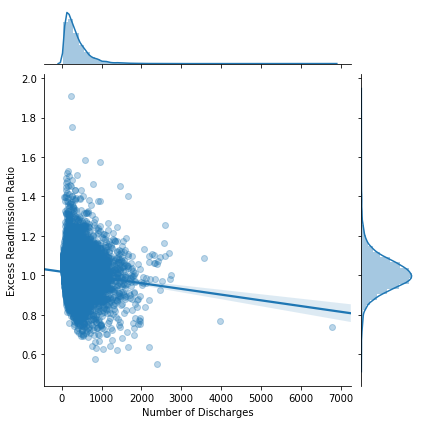

In [116]:
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=df, kind='reg', scatter_kws={'alpha':0.3})
